<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">Statistical Learning - 255381</h1>
<h3 align="center">Dr. Hoda Mohammadzade</h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>  Spring 2022</h5>

---

# Problem Set 05
<h4 align="center">Vahid Pourakbar     400205511</h4>


---
---

In [1]:
%reset -f
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression as Logistic
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

## Question 2

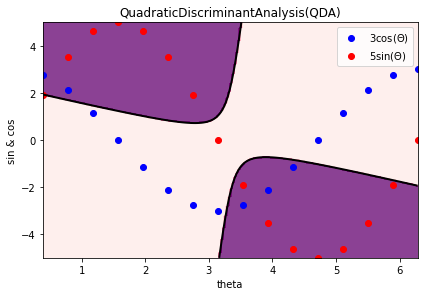

In [2]:
i = np.arange(1,17)
theta = i * (np.pi / 8)
x1 = 3 * np.cos(theta)
x2 = 5 * np.sin(theta)
X = np.concatenate((np.c_[theta, x1], np.c_[theta, x2]))
y = np.array([1 if j<16 else 2 for j in range(32)])

qda = QDA()
qda = qda.fit(X, y)

tt = np.linspace(np.pi/8, 2*np.pi, 200)
xx = np.linspace(-5,5, 200)
tt, xx = np.meshgrid(tt, xx)
T_grid = np.c_[tt.ravel(), xx.ravel()]
zz_qda = qda.predict_proba(T_grid)[:,1].reshape(tt.shape)

plt.contourf(tt, xx, zz_qda > 0.5, alpha=0.75, cmap='RdPu')
plt.scatter(theta, x1, label='3cos(${\Theta}$)', color='b')
plt.scatter(theta, x2, label='5sin(${\Theta}$)', color='r')
plt.contour(tt, xx, zz_qda, [0.5], linewidths=2., colors='k')
plt.xlabel('theta'), plt.ylabel('sin & cos')
plt.tight_layout(), plt.legend()
plt.title('QuadraticDiscriminantAnalysis(QDA)')
plt.show()

## Question 4

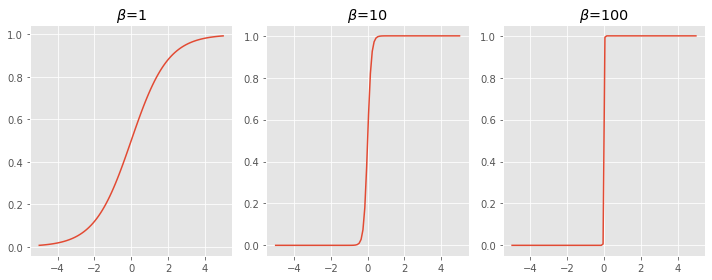

In [3]:
x = np.linspace(-5,5,100)
sigmoid = lambda beta1: 1 / (1 + np.exp(- beta1 * x))

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].set_title('${\\beta}$=1')
axes[0].plot(x, sigmoid(1))
axes[1].set_title('${\\beta}$=10')
axes[1].plot(x, sigmoid(10))
axes[2].set_title('${\\beta}$=100')
axes[2].plot(x, sigmoid(100))
fig.tight_layout()

## Question 7

### Part A

In [4]:
def Q7(mean1, cov1, mean2, cov2):
    X1_train = np.random.multivariate_normal(mean1, cov1,1000)
    X1_test = np.random.multivariate_normal(mean1, cov1,1000)
    X2_train = np.random.multivariate_normal(mean2, cov2,1000)
    X2_test = np.random.multivariate_normal(mean2, cov2,1000)
    X_train = np.concatenate((X1_train, X2_train))
    X_test = np.concatenate((X1_test, X2_test))
    y = np.concatenate((np.ones(1000, int), 2*np.ones(1000, int)))

    lda = LDA().fit(X_train, y)
    qda = QDA().fit(X_train, y)
    logistic = Logistic().fit(X_train, y)
    print(f'{"LDA:":9s} accuracy of train set: {lda.score(X_train, y)}', end='\t')
    print(f' accuracy of test set: {lda.score(X_test, y)}')

    print(f'{"QDA:":9s} accuracy of train set: {qda.score(X_train, y)}', end='\t')
    print(f' accuracy of test set: {qda.score(X_test, y)}')
    
    print(f'Logistic: accuracy of train set: {logistic.score(X_train, y)}', end='\t')
    print(f' accuracy of test set: {logistic.score(X_test, y)}')

    cm = [confusion_matrix(y, lda.predict(X_test))]
    cm.append(confusion_matrix(y, qda.predict(X_test)))
    cm.append(confusion_matrix(y, logistic.predict(X_test)))

    fig, ax = plt.subplots(1,3,figsize=(10, 4))
    ax[0].set_title('LDA'), ax[1].set_title('QDA'), ax[2].set_title('Logistic')
    for a, k in zip(ax, range(3)):
        a.imshow(cm[k], cmap = 'Pastel1')
        a.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 1', 'Predicted 2'))
        a.yaxis.set(ticks=(0, 1), ticklabels=('Actual 1', 'Actual 2'))
        a.set_ylim(1.5, -0.5), a.grid(False)
        for i in range(2):
            for j in range(2):
                a.text(j, i, cm[k][i, j], ha='center', va='center', color='b')
        fig.tight_layout()
    plt.show()

    X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1,
                               stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1,
                               stop = X_test[:, 1].max() + 1, step = 0.01))
    
    fig, ax = plt.subplots(1,3,figsize=(13, 5))
    ax[0].set_title('LDA'), ax[1].set_title('QDA'), ax[2].set_title('Logistic')
    lda_pred = lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    qda_pred = qda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    logistic_pred = logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
    ax[0].contourf(X1, X2, lda_pred, alpha = 0.75, cmap = 'Set3')
    ax[1].contourf(X1, X2, qda_pred, alpha = 0.75, cmap = 'Set3')
    ax[2].contourf(X1, X2, logistic_pred, alpha = 0.75, cmap = 'Set3')
    ax[0].contour(X1, X2, lda_pred, linewidths=2., colors='y')
    ax[1].contour(X1, X2, qda_pred, linewidths=2., colors='y')
    ax[2].contour(X1, X2, logistic_pred, linewidths=2., colors='y')
    for a in ax:
        a.scatter(X2_test[:, 0], X2_test[:, 1], alpha=0.5)
        a.scatter(X1_test[:, 0], X1_test[:, 1], alpha=0.5)
    fig.tight_layout()
    plt.show()
    return  

### Part A

LDA:      accuracy of train set: 0.922	 accuracy of test set: 0.9195
QDA:      accuracy of train set: 0.922	 accuracy of test set: 0.92
Logistic: accuracy of train set: 0.922	 accuracy of test set: 0.919


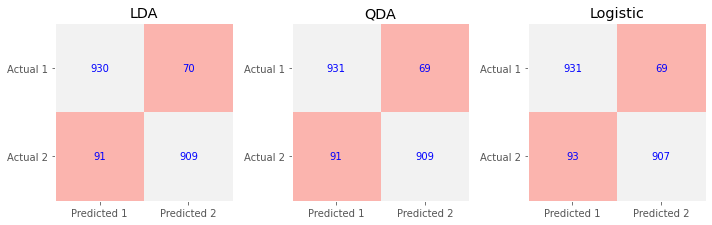

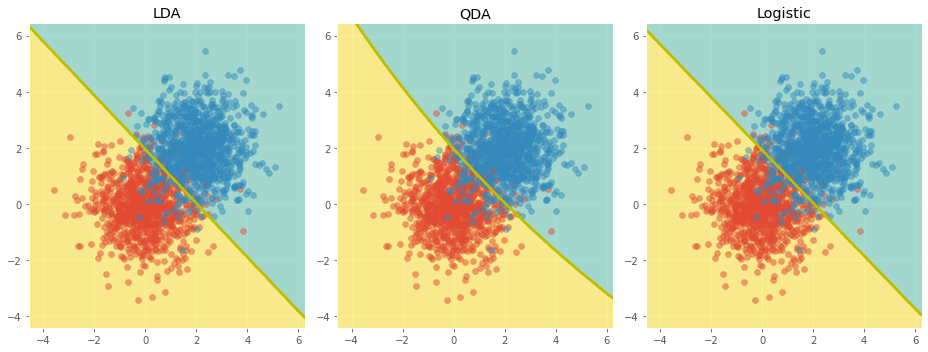

In [5]:
Q7(2*np.ones(2), np.eye(2), np.zeros(2), np.eye(2))

### Part B

LDA:      accuracy of train set: 0.963	 accuracy of test set: 0.959
QDA:      accuracy of train set: 0.998	 accuracy of test set: 0.994
Logistic: accuracy of train set: 0.993	 accuracy of test set: 0.991


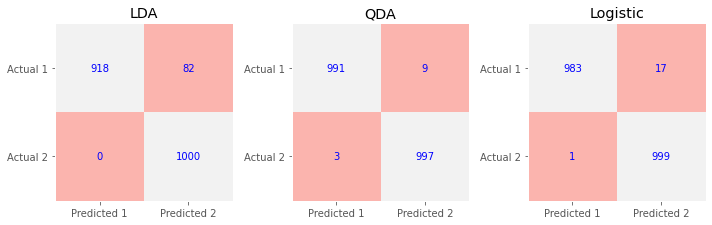

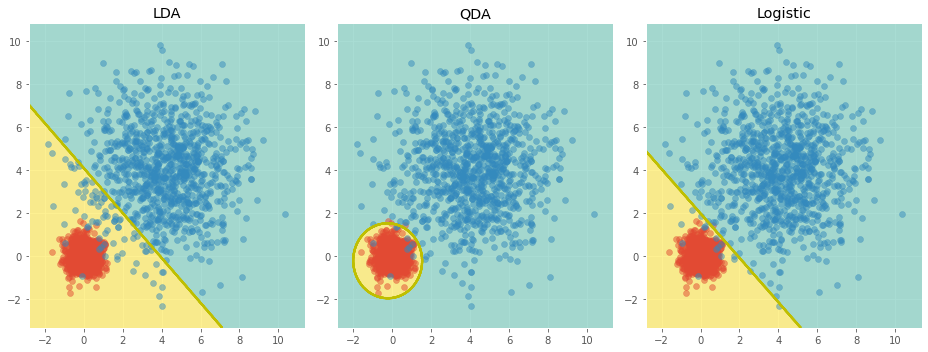

In [6]:
Q7(4*np.ones(2), 4*np.eye(2), np.zeros(2), 0.2*np.eye(2))

### Part C

LDA:      accuracy of train set: 0.8735	 accuracy of test set: 0.8855
QDA:      accuracy of train set: 0.926	 accuracy of test set: 0.921
Logistic: accuracy of train set: 0.8835	 accuracy of test set: 0.8745


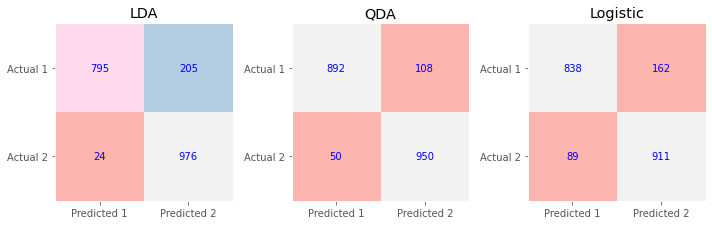

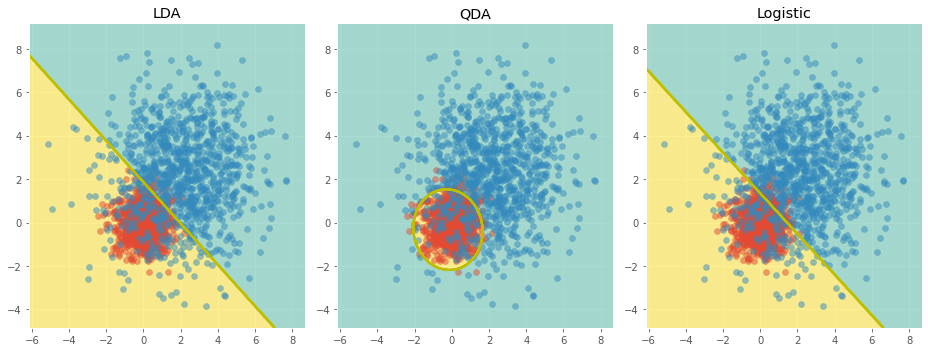

In [7]:
Q7(2*np.ones(2), 4*np.eye(2), np.zeros(2), 0.5*np.eye(2))

## Question 8

### Part A

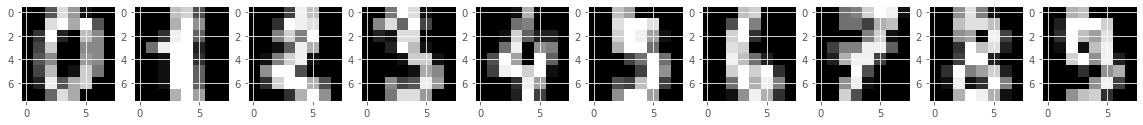

In [8]:
digits = load_digits()

plt.figure(figsize=(20,4))
for index, (image, _) in enumerate(zip(digits.data[:10], digits.target[:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

### Part B

In [9]:
def Q8_PartB(X_train, X_test, y_train, y_test):
    cm = []
    for n in [5, 20, 40]:
        knn = KNN(n_neighbors=n).fit(X_train, y_train)
        print(f'knn with K={n:2d} neighbors: score = {knn.score(X_test, y_test):.5f} ', end='  ')
        print(f'mean_absolute_error = {mean_absolute_error(y_test, knn.predict(X_test)):.5f}')
        cm.append(confusion_matrix(y_test, knn.predict(X_test)))
        
    lda = LDA().fit(X_train, y_train)
    print(f'LDA: score = {lda.score(X_test, y_test):.5f} ', end='  ')
    print(f'mean_absolute_error = {mean_absolute_error(y_test, lda.predict(X_test)):.5f}')
    cm.append(confusion_matrix(y_test, lda.predict(X_test)))

    qda = QDA().fit(X_train, y_train)
    print(f'QDA: score = {qda.score(X_test, y_test):.5f} ', end='  ')
    print(f'mean_absolute_error = {mean_absolute_error(y_test, qda.predict(X_test)):.5f}')
    cm.append(confusion_matrix(y_test, qda.predict(X_test)))

    # solver='newton-cg' to avoid ConvergenceWarning in 'lbfgs'
    logistic = Logistic(solver='newton-cg').fit(X_train, y_train)
    print(f'Logistic: score = {logistic.score(X_test, y_test):.5f} ', end='  ')
    print(f'mean_absolute_error = {mean_absolute_error(y_test, logistic.predict(X_test)):.5f}')
    cm.append(confusion_matrix(y_test, logistic.predict(X_test)))
    return cm

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, stratify=digits.target)
cm = Q8_PartB(X_train, X_test, y_train, y_test)

knn with K= 5 neighbors: score = 0.98704   mean_absolute_error = 0.06111
knn with K=20 neighbors: score = 0.96481   mean_absolute_error = 0.15370
knn with K=40 neighbors: score = 0.95370   mean_absolute_error = 0.22222
LDA: score = 0.95000   mean_absolute_error = 0.18148
QDA: score = 0.89259   mean_absolute_error = 0.35926


E:\software\Python\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Logistic: score = 0.96111   mean_absolute_error = 0.14074


### Part C

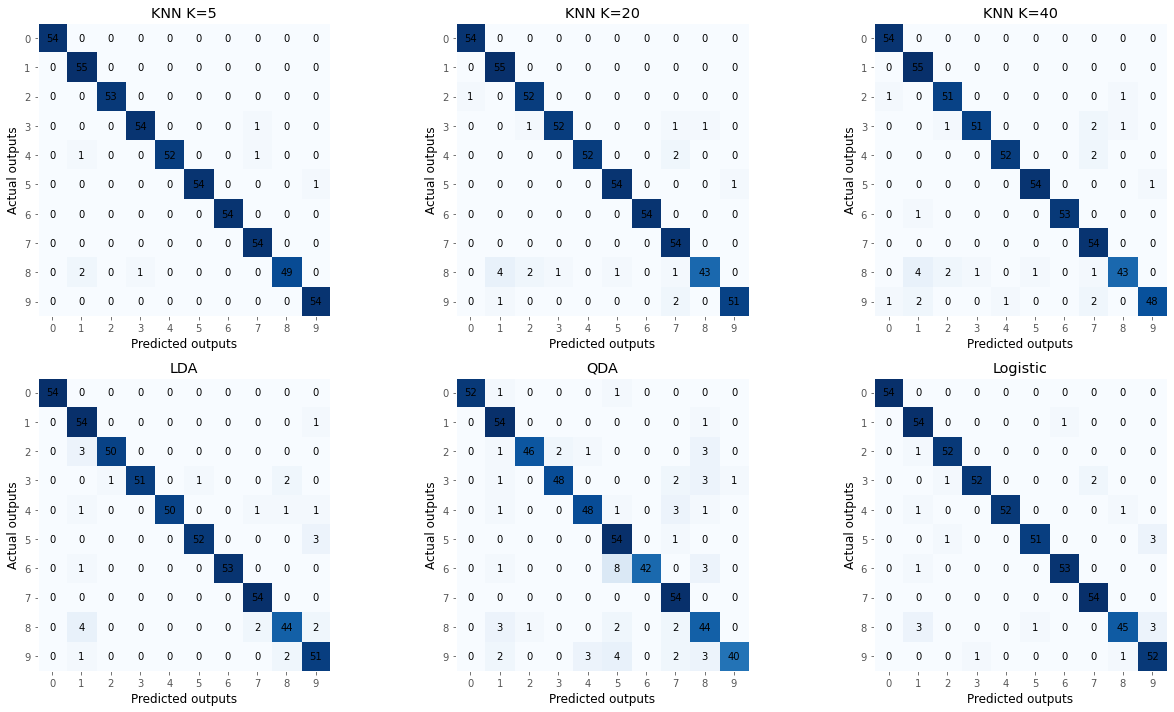

In [10]:
def Q8_PartC(cm):
    fig, axs = plt.subplots(2,3,figsize=(20, 10))
    axs[0][0].set_title('KNN K=5'), axs[0][1].set_title('KNN K=20'), axs[0][2].set_title('KNN K=40')
    axs[1][0].set_title('LDA'), axs[1][1].set_title('QDA'), axs[1][2].set_title('Logistic')
    for ax, c in zip(axs.flatten(), cm):
        ax.imshow(c, cmap = 'Blues')
        ax.set_xlabel('Predicted outputs', color='k')
        ax.set_ylabel('Actual outputs', color='k')
        ax.xaxis.set(ticks=range(10)), ax.yaxis.set(ticks=range(10))
        ax.set_ylim(9.5, -0.5),     ax.grid(False)
        for i in range(10):
            for j in range(10):
                ax.text(j, i, c[i, j], ha='center', va='center', color='k')
        fig.tight_layout()
    plt.show()
    return

Q8_PartC(cm)

### Part D

knn with K= 5 neighbors: score = 0.89259   mean_absolute_error = 0.51852
knn with K=20 neighbors: score = 0.73333   mean_absolute_error = 1.29815
knn with K=40 neighbors: score = 0.55000   mean_absolute_error = 2.15370
LDA: score = 0.86852   mean_absolute_error = 0.53889
QDA: score = 0.18889   mean_absolute_error = 2.80741


E:\software\Python\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Logistic: score = 0.92778   mean_absolute_error = 0.33889


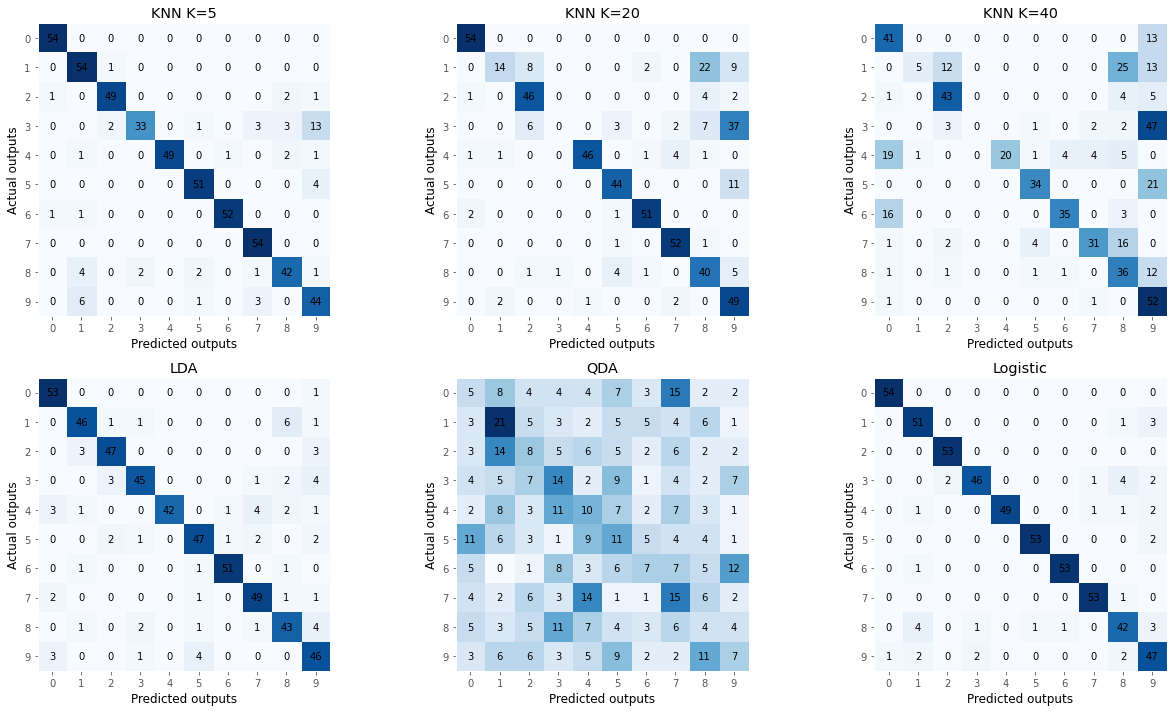

In [11]:
X2_train, _, y2_train, _ = train_test_split(X_train, y_train, train_size=0.1)
cm2 = Q8_PartB(X2_train, X_test, y2_train, y_test)
Q8_PartC(cm2)